<a href="https://colab.research.google.com/github/techniquenotes/Angular/blob/main/notebooks/train-yolov8-object-classification-on-custom-dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Roboflow Notebooks](https://ik.imagekit.io/roboflow/notebooks/template/bannertest2-2.png?ik-sdk-version=javascript-1.4.3&updatedAt=1672932710194)](https://github.com/roboflow/notebooks)

# How to Train YOLOv8 Object Detection on a Custom Dataset

---

[![Roboflow](https://raw.githubusercontent.com/roboflow-ai/notebooks/main/assets/badges/roboflow-blogpost.svg)](https://blog.roboflow.com/how-to-train-yolov8-on-a-custom-dataset)
[![YouTube](https://badges.aleen42.com/src/youtube.svg)](https://youtu.be/wuZtUMEiKWY)
[![GitHub](https://badges.aleen42.com/src/github.svg)](https://github.com/ultralytics/ultralytics)

Ultralytics YOLOv8 is the latest version of the YOLO (You Only Look Once) object detection and image segmentation model developed by Ultralytics. The YOLOv8 model is designed to be fast, accurate, and easy to use, making it an excellent choice for a wide range of object detection and image segmentation tasks. It can be trained on large datasets and is capable of running on a variety of hardware platforms, from CPUs to GPUs.

## Accompanying Blog Post

We recommend that you follow along in this notebook while reading the blog post on how to train YOLOv8 Object Detection, concurrently.

## Pro Tip: Use GPU Acceleration

If you are running this notebook in Google Colab, navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`. This will ensure your notebook uses a GPU, which will significantly speed up model training times.

## Steps in this Tutorial

In this tutorial, we are going to cover:

- Before you start
- Install YOLOv8
- CLI Basics
- Inference with Pre-trained COCO Model
- Roboflow Universe
- Preparing a custom dataset
- Custom Training
- Validate Custom Model
- Inference with Custom Model

**Let's begin!**

## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [1]:
!nvidia-smi

Sun Feb 23 05:19:35 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   52C    P8             12W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [3]:
# Pip install (recommended)

!pip install ultralytics

from IPython import display
display.clear_output() # 清除安装信息
!yolo mode=checks # 指定了运行模式为检查模式.检查内容可能包括 Python 版本、CUDA 支持（如果使用 GPU）、torch 库的安装等。

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
             ^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/cfg/__init__.py", line 919, in entrypoint
    raise ValueError(f"Invalid 'mode={mode}'. Valid modes are {MODES}.\n{CLI_HELP_MSG}")
ValueError: Invalid 'mode=<module 'ultralytics.utils.checks' from '/usr/local/lib/python3.11/dist-packages/ultralytics/utils/checks.py'>'. Valid modes are frozenset({'train', 'export', 'predict', 'val', 'track', 'benchmark'}).

    Arguments received: ['yolo', 'mode=checks']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

## CLI Basics

If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://v8docs.ultralytics.com/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml    epochs=1 ...
            ...           ...           ...
          segment        predict        yolov8n-seg.pt
          classify        val           yolov8n-cls.pt
```

## Inference with Pre-trained COCO Model

### 💻 CLI

`yolo mode=predict` runs YOLOv8 inference on a variety of sources, downloading models automatically from the latest YOLOv8 release, and saving results to `runs/predict`.

In [5]:
%cd {HOME}
# 指定要执行的任务类型为目标检测。运行模式为预测模式。设置置信度阈值
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg'

/content
100% 6.25M/6.25M [00:00<00:00, 305MB/s]
Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n summary (fused): 72 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs

100% 104k/104k [00:00<00:00, 56.6MB/s]
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 41.3ms
Speed: 13.4ms preprocess, 41.3ms inference, 304.9ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [8]:
%cd {HOME}
Image(filename='runs/detect/predict/dog.jpeg', height=600)

/content


FileNotFoundError: [Errno 2] No such file or directory: 'runs/detect/predict/dog.jpeg'

### 🐍 Python SDK

In [ ]:
 %cd {HOME}

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="deO5u1tP8oXg2HyoSRT4")
project = rf.workspace("tdc").project("cow-identification")
dataset = project.version(1).download("folder")

/content
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 KB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 KB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 KB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.5/138.5 KB 13.8 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=3db629a7dd653197109fded2860fe163dd439c6ff420d742a7cec6c65c5a8a4f
  Stored in directory: /root/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built wget
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalli

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to Cow-Identification-1 in folder:: 100%|██████████| 6693/6693 [00:04<00:00, 1517.74it/s]


In [ ]:
%cd {HOME}

/content


In [ ]:
 #from ultralytics import YOLO

    # Load a model
   # model = YOLO("yolov8n-cls.yaml")  # build a new model from scratch
   # model = YOLO("yolov8n-cls.pt")  # load a pretrained model (recommended for training)

    # Train the model
   # results = model.train(data="", epochs=100, imgsz=64)

# Load YOLOv8n-cls, train it on imagenette160 for 3 epochs and predict an image with it
from ultralytics import YOLO

model = YOLO('yolov8n-cls.pt')  # load a pretrained YOLOv8n classification model
model.train(data='/content/Cow-Identification-1', epochs=3)  # train the model
model('/content/Cow-Identification-1/test/cattle_2700/cattle_2700_DSCF1273_jpg.rf.18e7015665545779572565fd6002ce77.jpg')  # predict on an image

Ultralytics YOLOv8.0.5 🚀 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)
yolo/engine/trainer: task=classify, mode=train, model=yolov8n-cls.yaml, data=/content/Cow-Identification-1, epochs=3, patience=50, batch=16, imgsz=224, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=False, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, retina_masks=False, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=17, workspace=4, nms=False, lr0=

In [ ]:
!yolo task=classify mode=train model=yolov8n-cls.pt data='/content/Cow-Identification-1' epochs=25

Ultralytics YOLOv8.0.5 🚀 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)
yolo/engine/trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=/content/Cow-Identification-1, epochs=25, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=False, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, retina_masks=False, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=17, workspace=4, nms=False, lr0=0

In [ ]:
!yolo task=classify mode=val model=/content/runs/classify/train8/weights/best.pt data='/content/Cow-Identification-1'

Ultralytics YOLOv8.0.5 🚀 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)
Fusing layers... 
YOLOv8n-cls summary: 73 layers, 1775626 parameters, 0 gradients, 3.6 GFLOPs
albumentations: RandomResizedCrop(p=1.0, height=640, width=640, scale=(0.08, 1.0), ratio=(0.75, 1.3333333333333333), interpolation=1), HorizontalFlip(p=0.5), ColorJitter(p=0.5, brightness=[0.6, 1.4], contrast=[0.6, 1.4], saturation=[0.6, 1.4], hue=[0, 0]), Normalize(p=1.0, mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225), max_pixel_value=255.0), ToTensorV2(always_apply=True, p=1.0, transpose_mask=False)
               classes   top1_acc   top5_acc: 100% 16/16 [00:04<00:00,  3.62it/s]
                   all    0.00398     0.0239
Speed: 0.4ms pre-process, 2.3ms inference, 0.0ms loss, 0.0ms post-process per image


In [ ]:
!yolo task=classify mode=predict model='/content/runs/classify/train7/weights/best.pt' conf=0.25 source='/content/Cow-Identification-1/test/cattle_2700/cattle_2700_DSCF1273_jpg.rf.18e7015665545779572565fd6002ce77.jpg'

Ultralytics YOLOv8.0.5 🚀 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)
Fusing layers... 
YOLOv8n-cls summary: 73 layers, 1775626 parameters, 0 gradients, 3.6 GFLOPs
image 1/1 /content/Cow-Identification-1/test/cattle_2700/cattle_2700_DSCF1273_jpg.rf.18e7015665545779572565fd6002ce77.jpg: 224x224 cattle_2700 0.05, cattle_5519 0.05, cattle_4422 0.04, cattle_5971 0.04, cattle_6066 0.04, 5.7ms
Speed: 0.3ms pre-process, 5.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/classify/predict3


In [ ]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolov8n-cls.pt")  # load an official model
model = YOLO("/content/runs/classify/train2/weights/best.pt")  # load a custom model

# Validate the model
results = model.val()  # no arguments needed, dataset and settings remembered

Ultralytics YOLOv8.0.5 🚀 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)
Fusing layers... 
YOLOv8n-cls summary: 73 layers, 1775626 parameters, 0 gradients, 3.6 GFLOPs
albumentations: RandomResizedCrop(p=1.0, height=224, width=224, scale=(0.08, 1.0), ratio=(0.75, 1.3333333333333333), interpolation=1), HorizontalFlip(p=0.5), ColorJitter(p=0.5, brightness=[0.6, 1.4], contrast=[0.6, 1.4], saturation=[0.6, 1.4], hue=[0, 0]), Normalize(p=1.0, mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225), max_pixel_value=255.0), ToTensorV2(always_apply=True, p=1.0, transpose_mask=False)
               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:01<00:00, 10.66it/s]
                   all    0.00797      0.012
Speed: 0.1ms pre-process, 0.9ms inference, 0.0ms loss, 0.0ms post-process per image


In [ ]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolov8n-cls.pt")  # load an official model
model = YOLO("/content/runs/classify/train2/weights/best.pt")  # load a custom model

# Predict with the model
results = model("/content/Cow-Identification-1/test/cattle_2700/cattle_2700_DSCF1273_jpg.rf.18e7015665545779572565fd6002ce77.jpg")  # predict on an image



Ultralytics YOLOv8.0.5 🚀 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)
Fusing layers... 
YOLOv8n-cls summary: 73 layers, 1775626 parameters, 0 gradients, 3.6 GFLOPs
image 1/1 /content/Cow-Identification-1/test/cattle_2700/cattle_2700_DSCF1273_jpg.rf.18e7015665545779572565fd6002ce77.jpg: 224x224 cattle_2700 0.05, cattle_5519 0.05, cattle_4422 0.04, cattle_5971 0.04, cattle_6066 0.04, 4.9ms
Speed: 0.3ms pre-process, 4.9ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)


## Custom Training

In [ ]:
%cd {HOME}

!yolo task=classify mode=train model=yolov8n-cls.pt data={dataset.location} epochs=25


[Errno 2] No such file or directory: '{HOME}'
/content
no viable alternative at input '{dataset.location}'
See https://hydra.cc/docs/1.2/advanced/override_grammar/basic for details

Set the environment variable HYDRA_FULL_ERROR=1 for a complete stack trace.


In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml					    train_batch1.jpg
confusion_matrix.png				    train_batch2.jpg
events.out.tfevents.1673360155.b8486c1adb66.2291.0  train_batch585.jpg
F1_curve.png					    train_batch586.jpg
P_curve.png					    train_batch587.jpg
PR_curve.png					    val_batch0_labels.jpg
predictions.json				    val_batch0_pred.jpg
R_curve.png					    val_batch1_labels.jpg
results.csv					    val_batch1_pred.jpg
results.png					    weights
train_batch0.jpg


/content


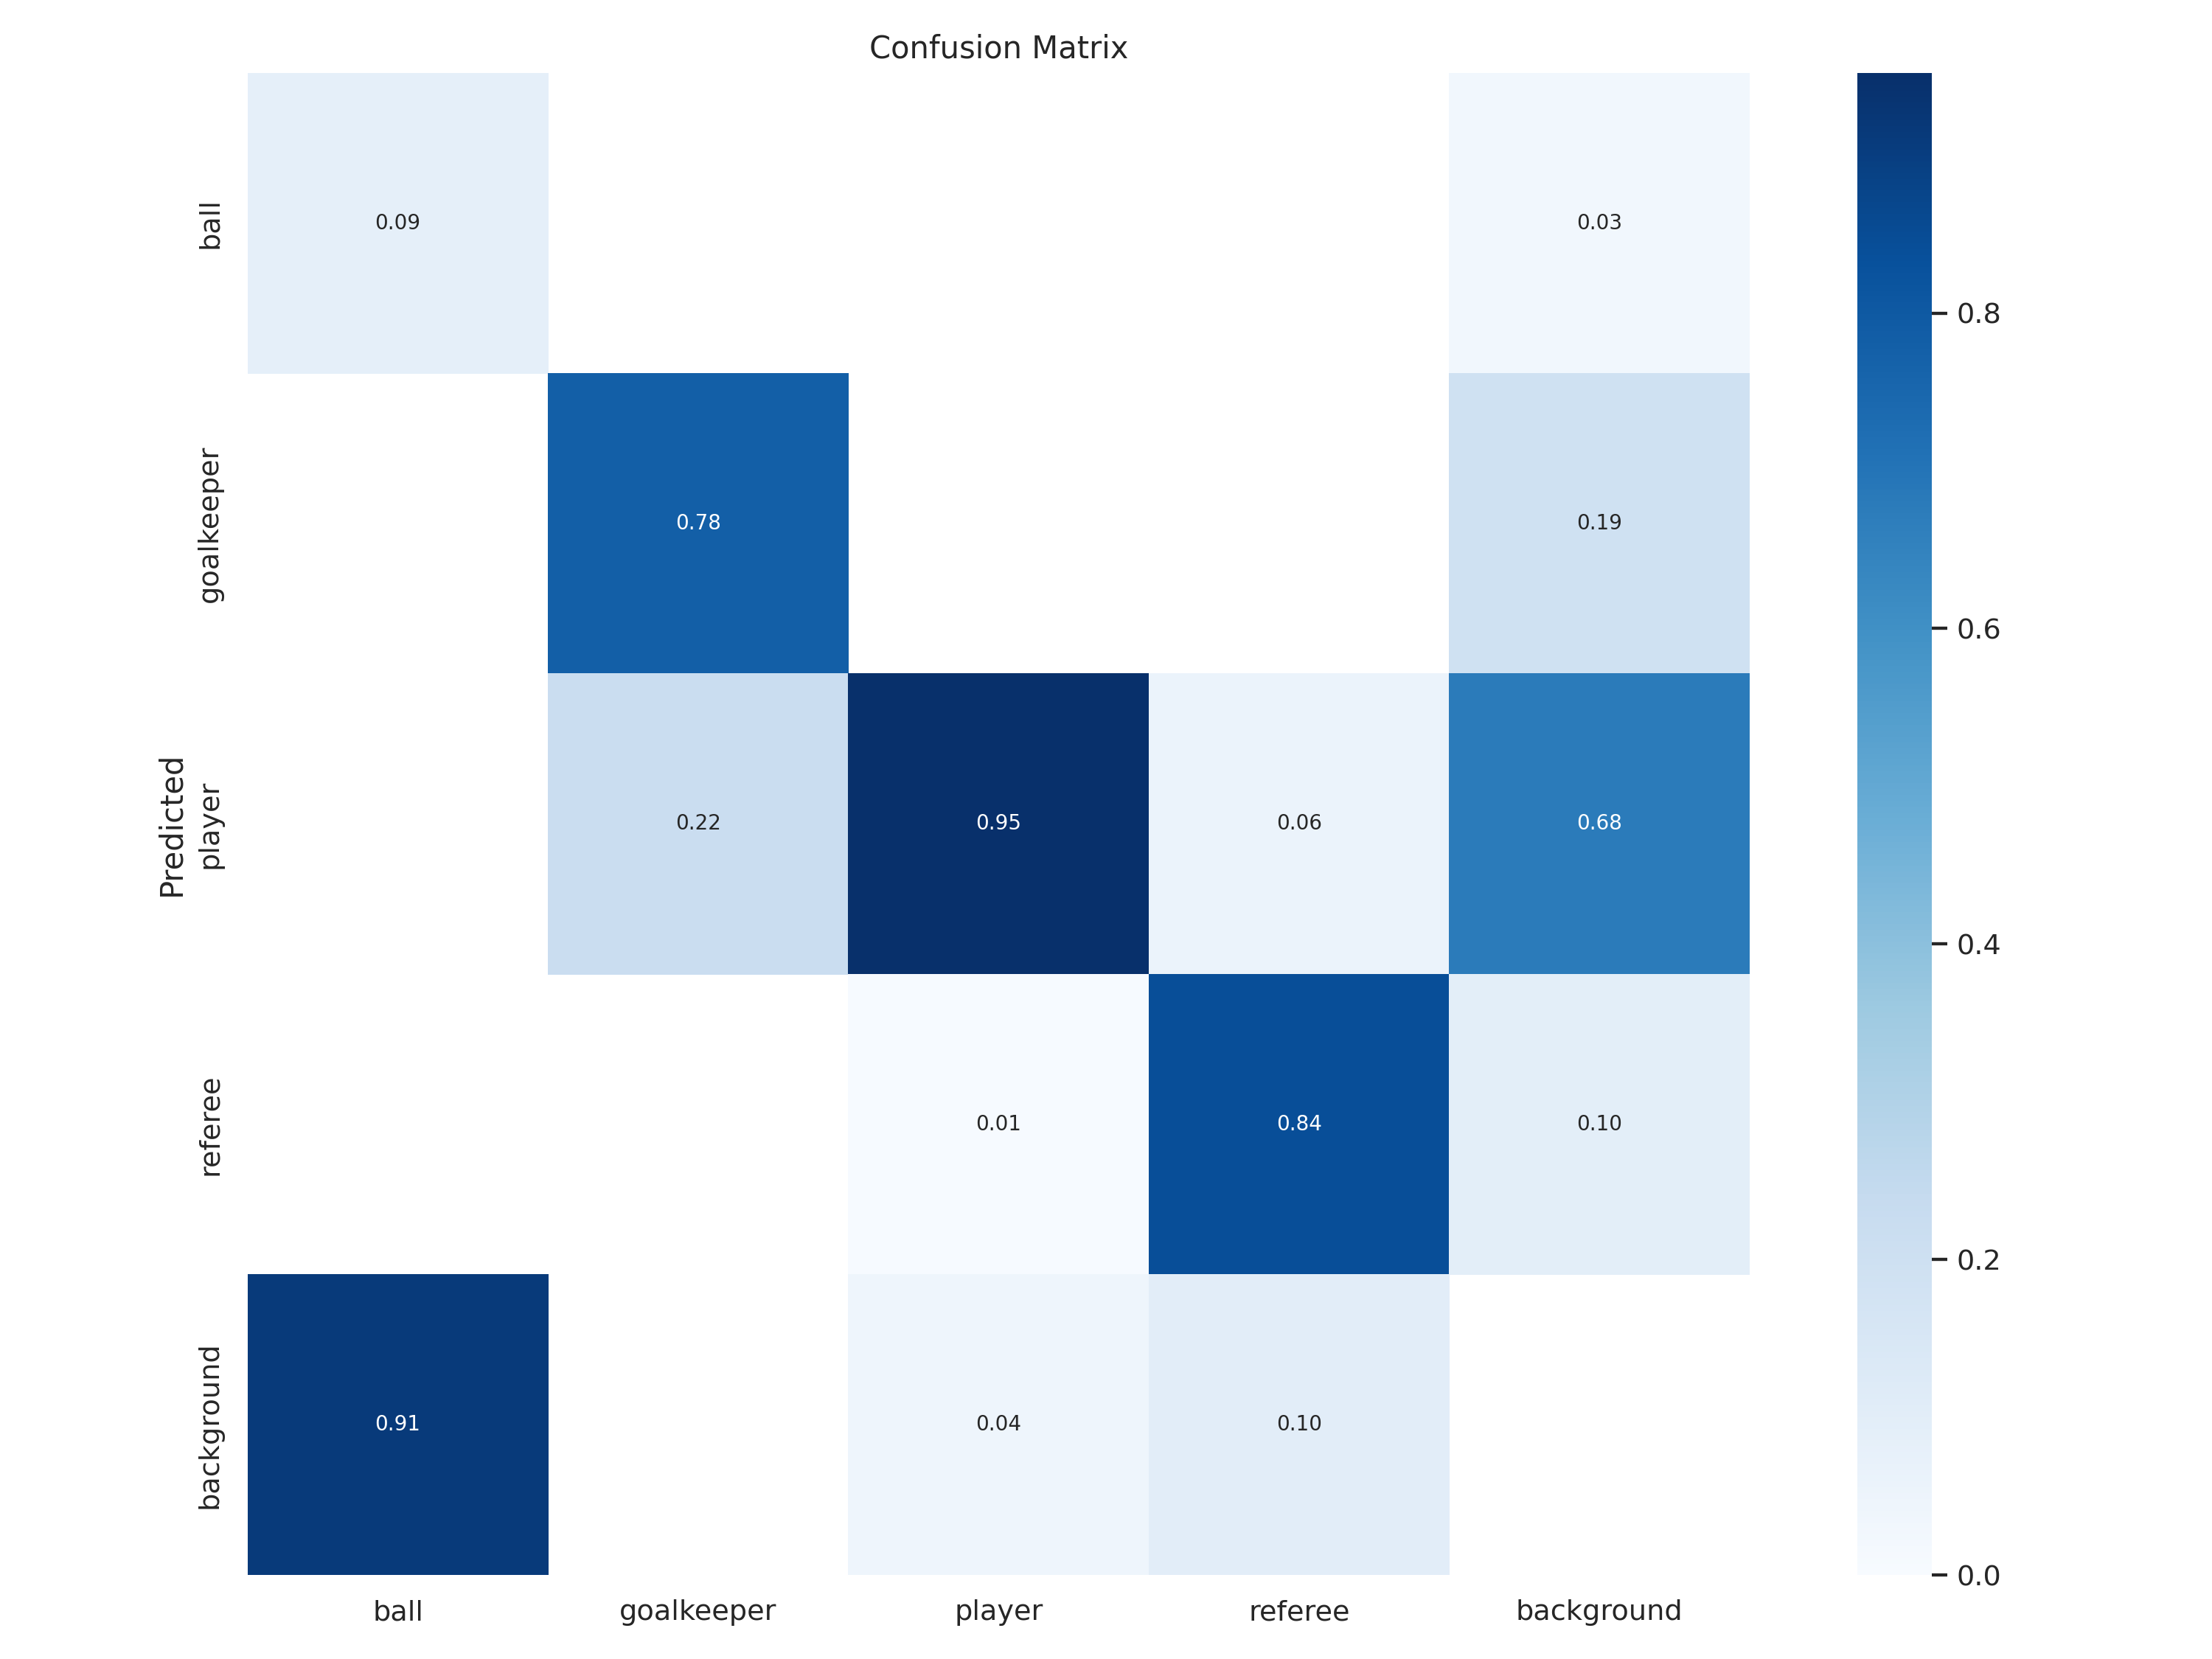

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


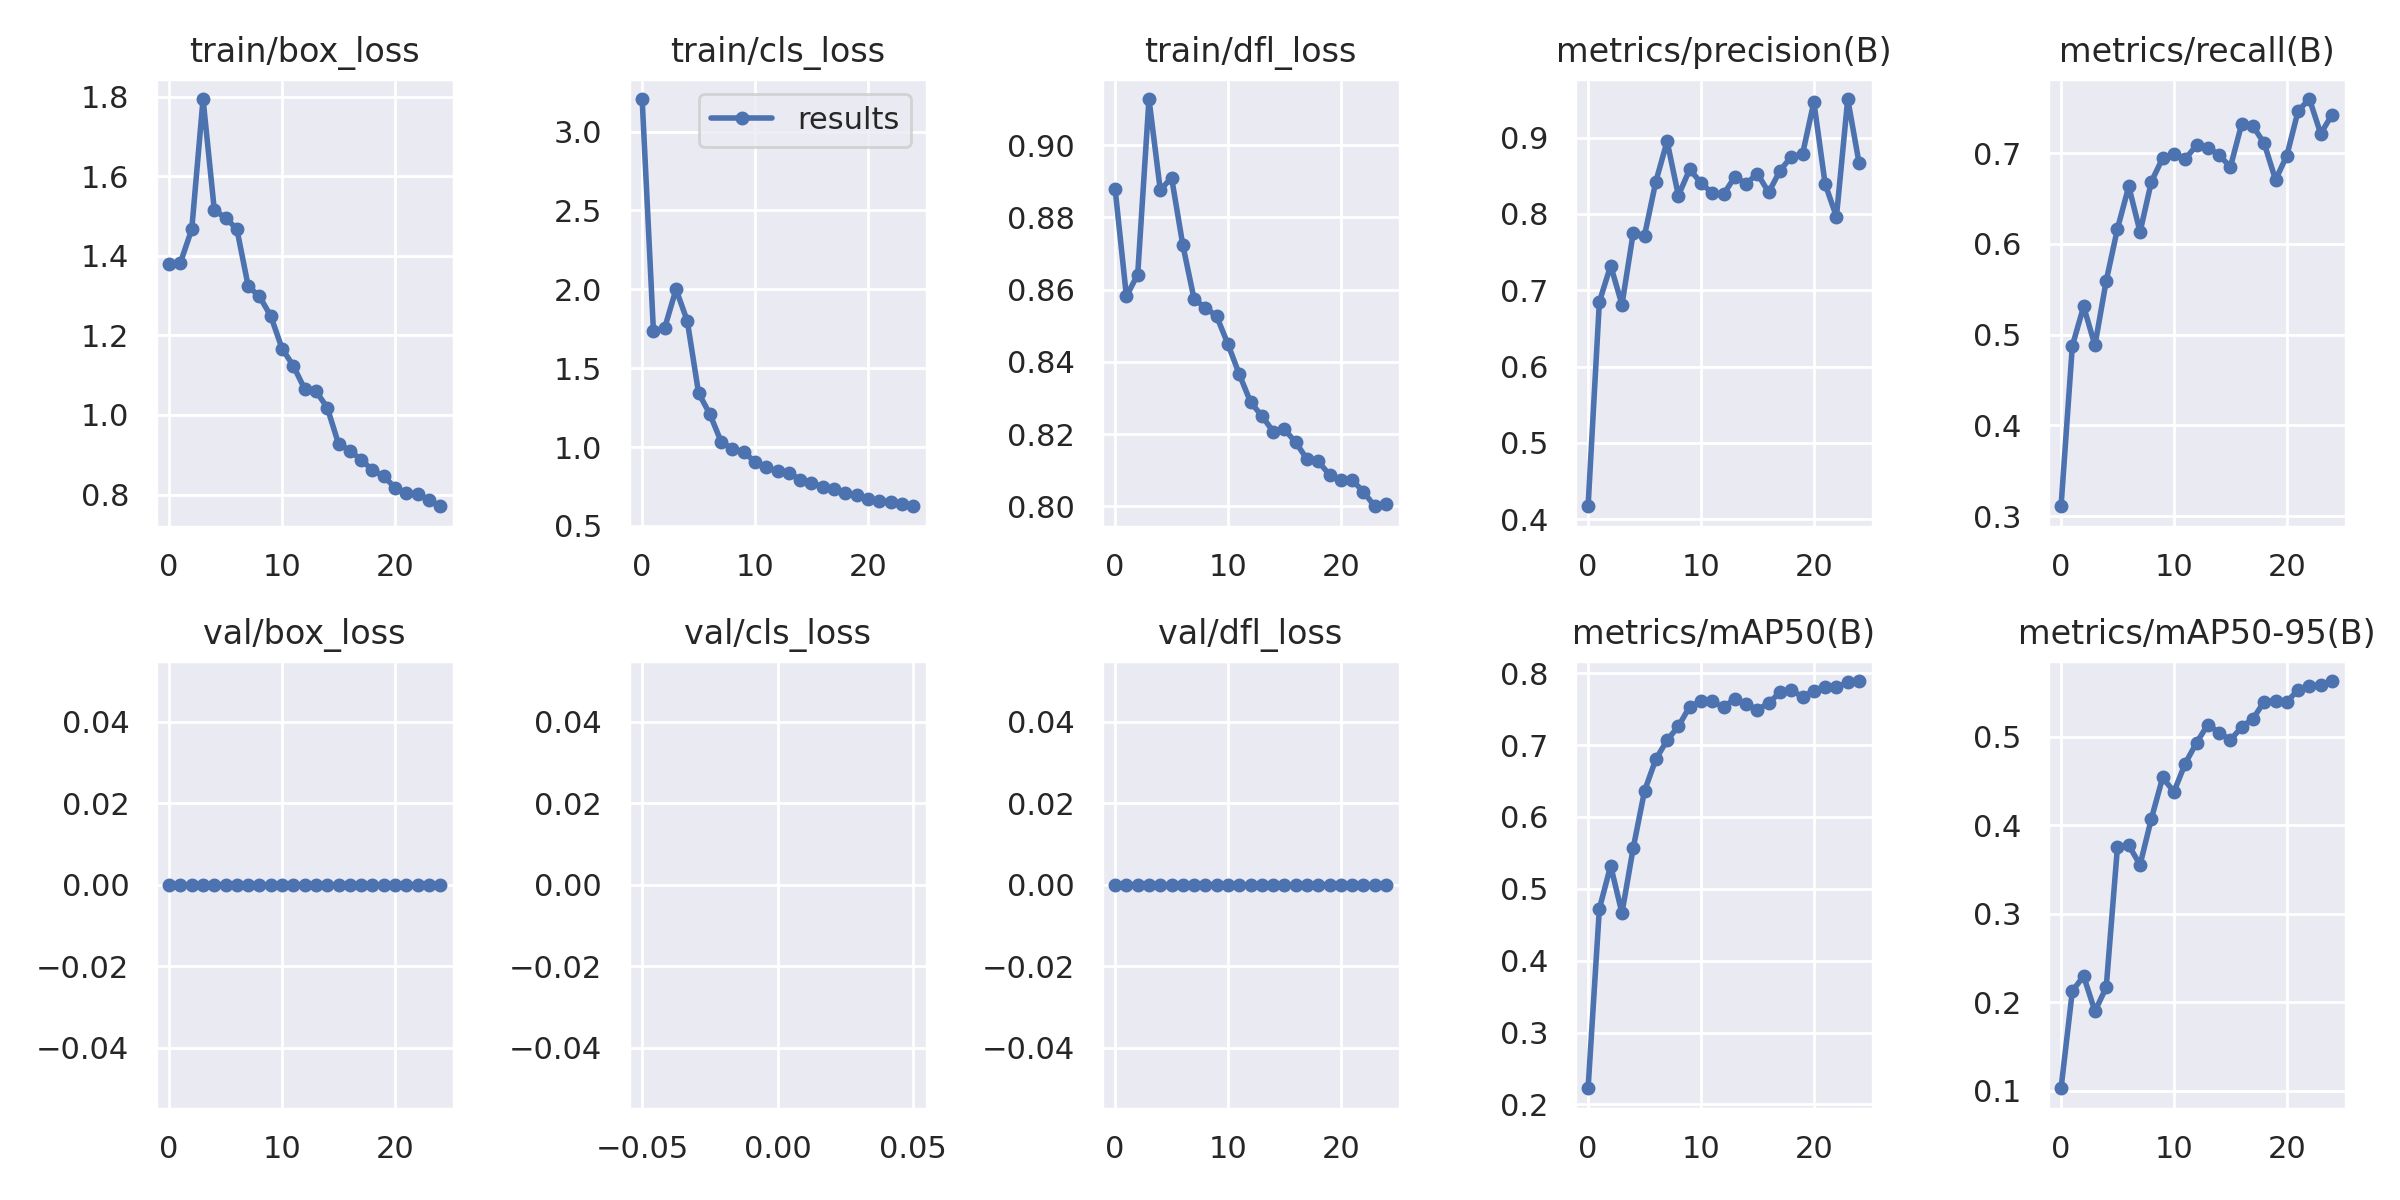

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


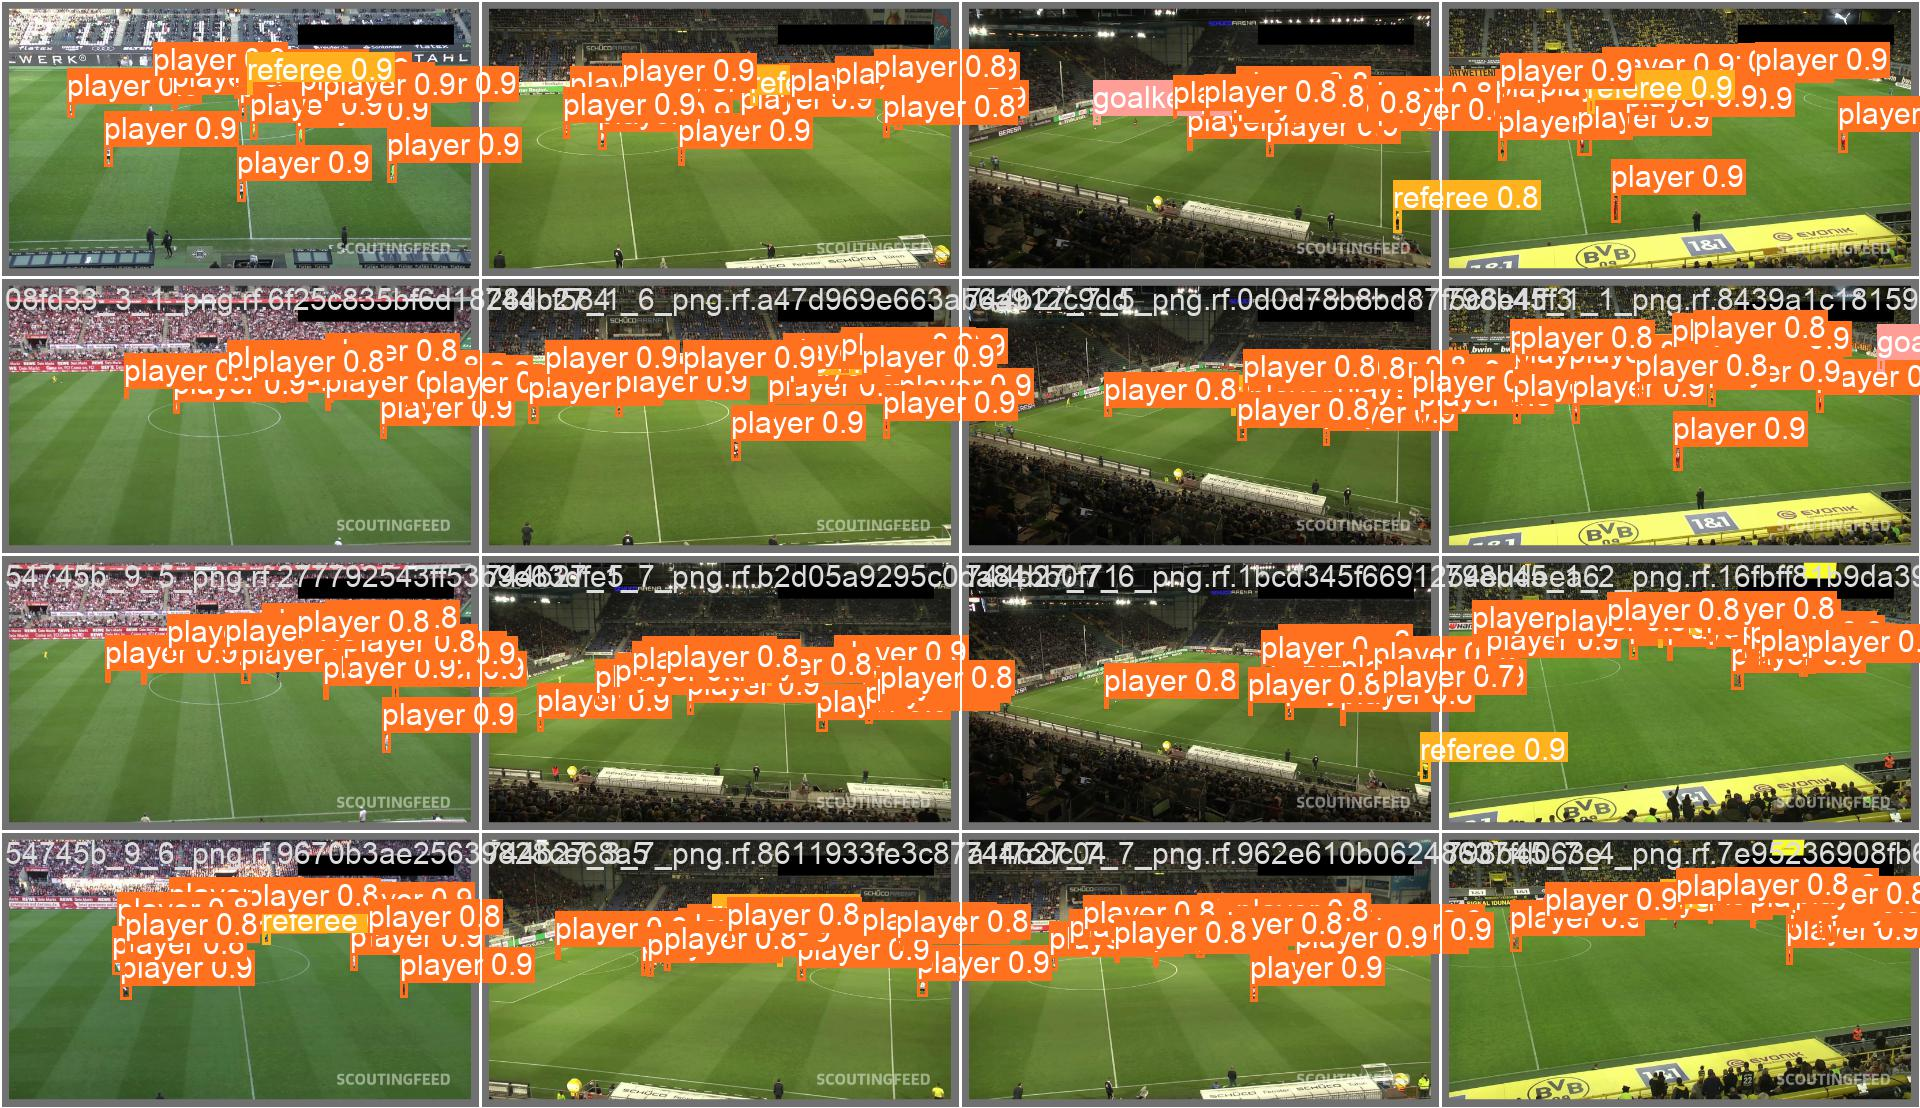

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.2 🚀 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)
Fusing layers... 
Model summary: 168 layers, 11127132 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/football-players-detection-1/valid/labels.cache... 38 images, 0 backgrounds, 0 corrupt: 100% 38/38 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 3/3 [00:04<00:00,  1.58s/it]
                   all         38        905      0.869      0.709      0.777       0.51
                  ball         38         35      0.957      0.229       0.33     0.0689
            goalkeeper         38         27      0.753      0.902      0.953      0.701
                player         38        754      0.956       0.93      0.975      0.742
               referee         38         89      0.812      0.775      0.851      0.528
Speed: 3.7ms pre-process, 9.5ms inference, 0.0ms loss, 3.1ms post-process per image


## Inference with Custom Model

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images

/content
Ultralytics YOLOv8.0.2 🚀 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)
Fusing layers... 
Model summary: 168 layers, 11127132 parameters, 0 gradients, 28.4 GFLOPs
image 1/13 /content/football-players-detection-1/test/images/40cd38_7_6_png.rf.68ef7fcd663cdf0f5b96bacdbcd94e07.jpg: 384x640 21 players, 1 referee, 15.5ms
image 2/13 /content/football-players-detection-1/test/images/42ba34_1_5_png.rf.4337fde8fbe3640cf4351fb41ac9c3ca.jpg: 384x640 1 goalkeeper, 23 players, 1 referee, 11.6ms
image 3/13 /content/football-players-detection-1/test/images/42ba34_5_5_png.rf.ceb556bd4c92d41496ae1d8c56600c4a.jpg: 384x640 1 goalkeeper, 20 players, 1 referee, 11.6ms
image 4/13 /content/football-players-detection-1/test/images/4b770a_1_4_png.rf.5a45b3b841a06de414ceb802e34c136f.jpg: 384x640 1 goalkeeper, 20 players, 3 referees, 11.6ms
image 5/13 /content/football-players-detection-1/test/images/4b770a_3_6_png.rf.d0d9403f2f73ca0da7a6a1373c02b749.jpg: 384x640 1 goalkeeper, 20 players, 

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict3/*.jpg')[:1]:
      display(Image(filename=image_path, width=600))
      print("\n")

## Deploy model on Roboflow

Once you have finished training your YOLOv8 model, you’ll have a set of trained weights ready for use. These weights will be in the `/runs/detect/train/weights/best.pt` folder of your project. You can upload your model weights to Roboflow Deploy to use your trained weights on our infinitely scalable infrastructure.

The `.deploy()` function in the [Roboflow pip package](https://docs.roboflow.com/python) now supports uploading YOLOv8 weights.

To upload model weights, add the following code to the “Inference with Custom Model” section in the aforementioned notebook:

In [ ]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train/")

View the status of your deployment at: https://app.roboflow.com/roboflow-jvuqo/football-players-detection-3zvbc/1
Share your model with the world at: https://universe.roboflow.com/roboflow-jvuqo/football-players-detection-3zvbc/1


## 🏆 Congratulations

### Learning Resources

Roboflow has produced many resources that you may find interesting as you advance your knowledge of computer vision:

- [Roboflow Notebooks](https://github.com/roboflow/notebooks): A repository of over 20 notebooks that walk through how to train custom models with a range of model types, from YOLOv7 to SegFormer.
- [Roboflow YouTube](https://www.youtube.com/c/Roboflow): Our library of videos featuring deep dives into the latest in computer vision, detailed tutorials that accompany our notebooks, and more.
- [Roboflow Discuss](https://discuss.roboflow.com/): Have a question about how to do something on Roboflow? Ask your question on our discussion forum.
- [Roboflow Models](https://roboflow.com): Learn about state-of-the-art models and their performance. Find links and tutorials to guide your learning.

### Convert data formats

Roboflow provides free utilities to convert data between dozens of popular computer vision formats. Check out [Roboflow Formats](https://roboflow.com/formats) to find tutorials on how to convert data between formats in a few clicks.

### Connect computer vision to your project logic

[Roboflow Templates](https://roboflow.com/templates) is a public gallery of code snippets that you can use to connect computer vision to your project logic. Code snippets range from sending emails after inference to measuring object distance between detections.